# **`IMAGE CLASSIFICATION IS USING SIMPLE CNN AND VGG16 FOR DOG AND CAT CLASSIFICATION USING IMAGES`**

*Importing the requirement libraries.*

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

*Mounting the Google Drive*

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


*Creating the training, validation and testing.*

In [3]:
"""
os.chdir('/content/drive/My Drive/Dataset DC')
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

  for c in random.sample(glob.glob('cat*'),500):
    shutil.move(c,'train/cat')
  for c in random.sample(glob.glob('dog*'),500):
    shutil.move(c,'train/dog')
  for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat')
  for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog')
  for c in random.sample(glob.glob('cat*'),50):
    shutil.move(c,'test/cat')
  for c in random.sample(glob.glob('dog*'),50):
    shutil.move(c,'test/dog')

os.chdir('../../)
    """

"\nos.chdir('/content/drive/My Drive/Dataset DC')\nif os.path.isdir('train/dog') is False:\n  os.makedirs('train/dog')\n  os.makedirs('train/cat')\n  os.makedirs('valid/dog')\n  os.makedirs('valid/cat')\n  os.makedirs('test/dog')\n  os.makedirs('test/cat')\n\n  for c in random.sample(glob.glob('cat*'),500):\n    shutil.move(c,'train/cat')\n  for c in random.sample(glob.glob('dog*'),500):\n    shutil.move(c,'train/dog')\n  for c in random.sample(glob.glob('cat*'),100):\n    shutil.move(c,'valid/cat')\n  for c in random.sample(glob.glob('dog*'),100):\n    shutil.move(c,'valid/dog')\n  for c in random.sample(glob.glob('cat*'),50):\n    shutil.move(c,'test/cat')\n  for c in random.sample(glob.glob('dog*'),50):\n    shutil.move(c,'test/dog')\n\nos.chdir('../../)\n    "

*Making the paths for the training, validation and testing data.*

In [4]:
train_path = '/content/drive/My Drive/Dataset DC/train'
valid_path = '/content/drive/My Drive/Dataset DC/valid'
test_path = '/content/drive/My Drive/Dataset DC/test'

*Pre-processing the images and reducing the pixel size 224x224 and in the batches of 10 images.*

In [5]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = train_path, target_size =(224,224), classes = ['cat', 'dog'], batch_size=10 )

valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = valid_path, target_size =(224,224), classes = ['cat', 'dog'], batch_size=10 )

test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory = test_path, target_size =(224,224), classes = ['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


*Verifying the count of images and the classes count.*

In [6]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [7]:
imgs, labels = next(train_batches)

*Ploting the images with their classes.*

In [8]:
def plotImages (image_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

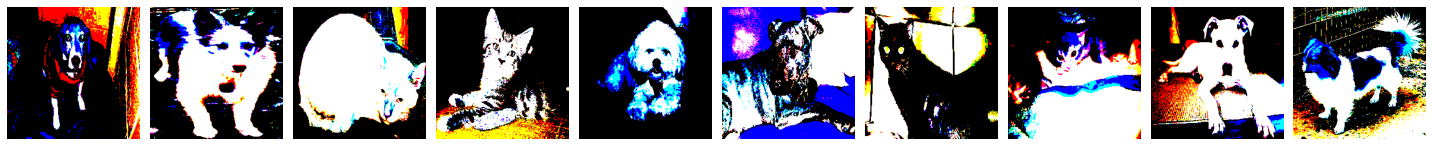

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

*Creating the simple Convolutional Neural Network (CNN) with 5 hidden layers (2 Conv2D layers, 2 Pooling Layers and 1 fully-connected (FC) Dense Layer.*

In [10]:
model = Sequential([
    Conv2D(filters= 32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

*Compiling the layers of the model.*

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

*Training the model.*

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=1)

Epoch 1/10
100/100 [==============================] - 72s 717ms/step - loss: 12.3354 - accuracy: 0.5600 - val_loss: 5.4060 - val_accuracy: 0.6250
Epoch 2/10
100/100 [==============================] - 72s 717ms/step - loss: 2.4633 - accuracy: 0.7580 - val_loss: 3.7042 - val_accuracy: 0.6350
Epoch 3/10
100/100 [==============================] - 71s 713ms/step - loss: 0.9585 - accuracy: 0.8490 - val_loss: 2.8670 - val_accuracy: 0.6300
Epoch 4/10
100/100 [==============================] - 71s 713ms/step - loss: 0.2488 - accuracy: 0.9360 - val_loss: 3.5621 - val_accuracy: 0.5750
Epoch 5/10
100/100 [==============================] - 76s 756ms/step - loss: 0.0618 - accuracy: 0.9810 - val_loss: 2.8471 - val_accuracy: 0.6150
Epoch 6/10
100/100 [==============================] - 72s 716ms/step - loss: 0.0406 - accuracy: 0.9900 - val_loss: 2.9724 - val_accuracy: 0.5950
Epoch 7/10
100/100 [==============================] - 71s 715ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 2.7833 - val_a

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

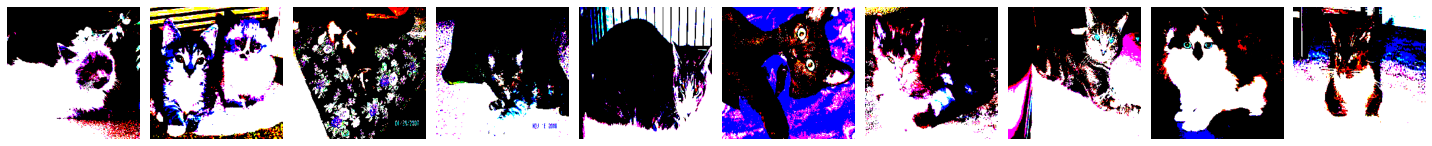

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

*Predicting using the model on the test data.*

In [16]:
predictions = model.predict(x=test_batches, verbose=0)

In [17]:
predictions

array([[5.19677699e-02, 9.48032200e-01],
       [9.30722356e-01, 6.92775995e-02],
       [4.03787348e-14, 1.00000000e+00],
       [1.00000000e+00, 2.80751644e-09],
       [1.00000000e+00, 1.12225180e-08],
       [1.00000000e+00, 1.25877794e-10],
       [9.25421596e-01, 7.45784566e-02],
       [9.99837160e-01, 1.62824421e-04],
       [9.94904160e-01, 5.09578874e-03],
       [9.98593867e-01, 1.40610174e-03],
       [9.85030492e-05, 9.99901533e-01],
       [2.47174650e-02, 9.75282550e-01],
       [6.89920932e-02, 9.31007862e-01],
       [9.13759589e-01, 8.62404183e-02],
       [9.98786628e-01, 1.21333066e-03],
       [8.57129037e-01, 1.42870948e-01],
       [1.05317039e-02, 9.89468277e-01],
       [1.84502915e-01, 8.15497041e-01],
       [9.99985576e-01, 1.44781889e-05],
       [2.12376417e-05, 9.99978781e-01],
       [9.94750917e-01, 5.24906488e-03],
       [9.80008960e-01, 1.99910998e-02],
       [4.81229275e-01, 5.18770754e-01],
       [1.00000000e+00, 4.70513826e-14],
       [2.808972

In [18]:
import numpy as np
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [19]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

*Confusion Matrix*

In [20]:
cm

array([[32, 18],
       [15, 35]])

## Using the VGG156 Model for betetr results.

**Build Fine-tuned VGG16 Model download from the Keras Functional API (Application Programming Interface)**

In [21]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [22]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

*Calculating the parameters of the VGG16 model.*

In [23]:
def count_params(model):
  non_trainable_params = np.sum([np.prod(v.get_shape().as_list())for v in model.non_trainable_weights ]) 
  trainable_params = np.sum([np.prod(v.get_shape().as_list())for v in model.trainable_weights])
  return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

In [24]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [25]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

*Transferring the VGG16 model into Sequential Model without the prediction layer of the VGG16 Model.*

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

*Freezing all the layers so that we will not train it again but using it only for the prediction.*

In [29]:
for layer in model.layers:
  layer.trainable = False

*Adding the Prediction layer accordingly to our problem.*

In [30]:
model.add(Dense(units=2, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [32]:
params = count_params(model)
assert params['non_trainable_params'] == 134260544 
assert params['trainable_params'] == 8194

*Complining the model.*

In [33]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

*Training the model by fitting the data.*

In [34]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 611s - loss: 0.1409 - accuracy: 0.9520 - val_loss: 0.1985 - val_accuracy: 0.9450
Epoch 2/5
100/100 - 611s - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0743 - val_accuracy: 0.9750
Epoch 3/5
100/100 - 610s - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0823 - val_accuracy: 0.9700
Epoch 4/5
100/100 - 609s - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0786 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 611s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9700


In [35]:
assert model.history.history.get('accuracy')[-1] >0.95

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

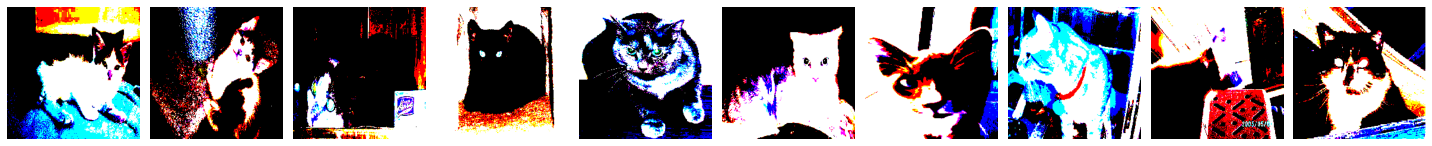

[[[[ -30.939003   -28.779      -26.68     ]
   [ -30.939003   -28.779      -26.68     ]
   [ -30.939003   -28.779      -26.68     ]
   ...
   [  21.060997   -11.778999   -19.68     ]
   [  24.060997    -9.778999   -17.68     ]
   [   8.060997   -19.779      -28.68     ]]

  [[ -30.939003   -28.779      -26.68     ]
   [ -30.939003   -28.779      -26.68     ]
   [ -30.939003   -28.779      -26.68     ]
   ...
   [  18.060997   -14.778999   -22.68     ]
   [  21.060997   -12.778999   -20.68     ]
   [  10.060997   -17.779      -26.68     ]]

  [[ -30.939003   -28.779      -26.68     ]
   [ -30.939003   -28.779      -26.68     ]
   [ -30.939003   -28.779      -26.68     ]
   ...
   [  24.060997    -8.778999   -16.68     ]
   [  25.060997    -8.778999   -16.68     ]
   [  12.060997   -15.778999   -24.68     ]]

  ...

  [[ -65.939      -28.779      -17.68     ]
   [ -61.939003   -24.779      -13.68     ]
   [ -69.939      -31.779      -18.68     ]
   ...
   [ -23.939003     4.2210007    6.

In [36]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_imgs)

*Prediction using VGG16 model.*

In [37]:
predictions = model.predict(x=test_batches, verbose=0)

In [38]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
cm = confusion_matrix(y_true= test_batches.classes, y_pred = np.argmax(predictions, axis=-1))

*Confusion Matrix for VGG16 Model.*

In [40]:
cm

array([[49,  1],
       [ 3, 47]])